In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier

In [260]:
df=pd.read_csv('gender_classification_v7.csv')

In [261]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [262]:
df.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [264]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [265]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [266]:
df.nunique()

long_hair                     2
forehead_width_cm            42
forehead_height_cm           21
nose_wide                     2
nose_long                     2
lips_thin                     2
distance_nose_to_lip_long     2
gender                        2
dtype: int64

In [267]:
df.duplicated().sum()

1768

In [268]:
df=df.drop_duplicates()

In [269]:
df.duplicated().sum()

0

In [270]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [271]:
df['gender'].value_counts()

gender
Male      1783
Female    1450
Name: count, dtype: int64

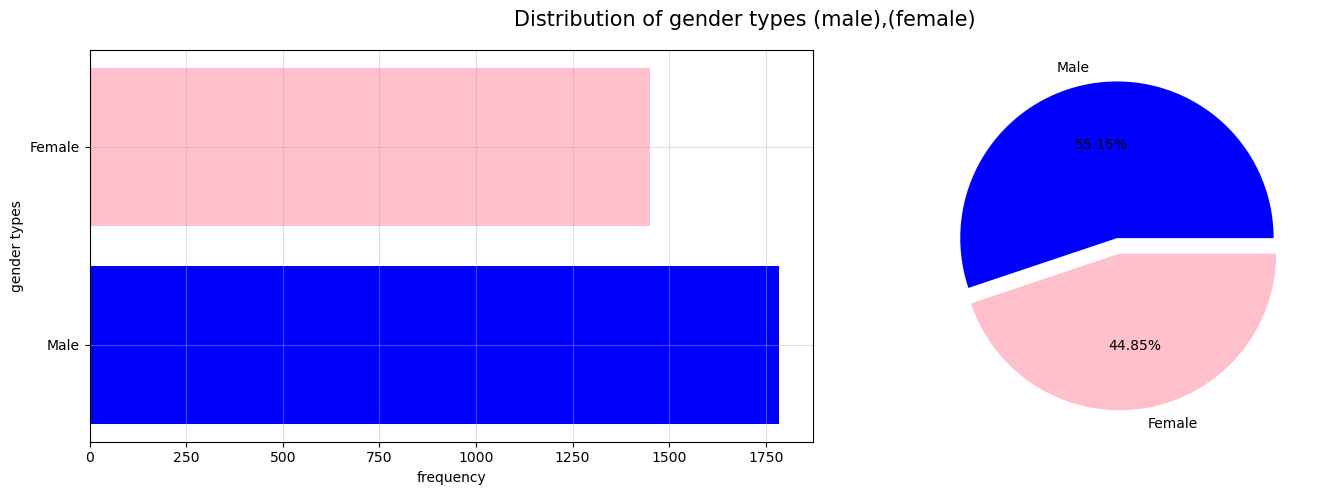

In [272]:
types=df['gender'].value_counts()
colors=['blue','pink']
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.barh(y=types.index,width=types.values,color=colors)
ax1.set_xlabel('frequency')
ax1.set_ylabel('gender types')
ax1.grid(alpha=0.4)
ax2.pie(types.values,labels=types.index,explode=([0.05]*len(types.index)),colors=colors,autopct='%.2f%%')
fig.suptitle('Distribution of gender types (male),(female)',fontsize=15)
plt.tight_layout()


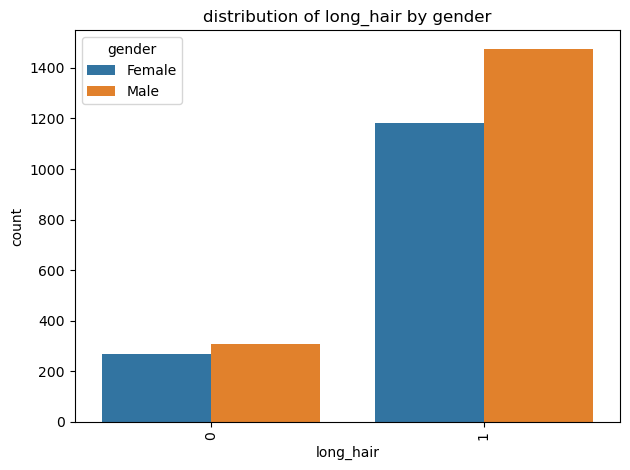

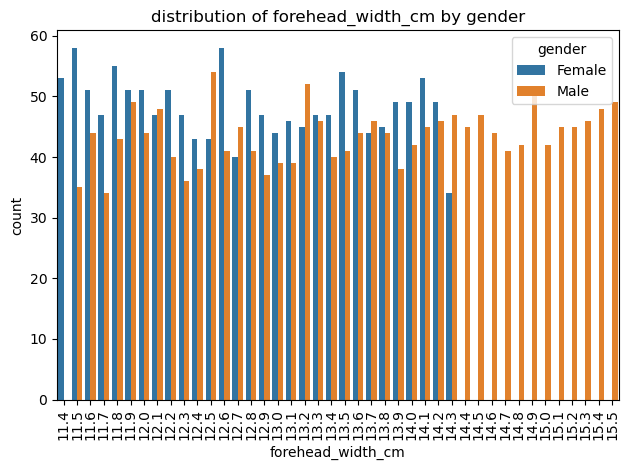

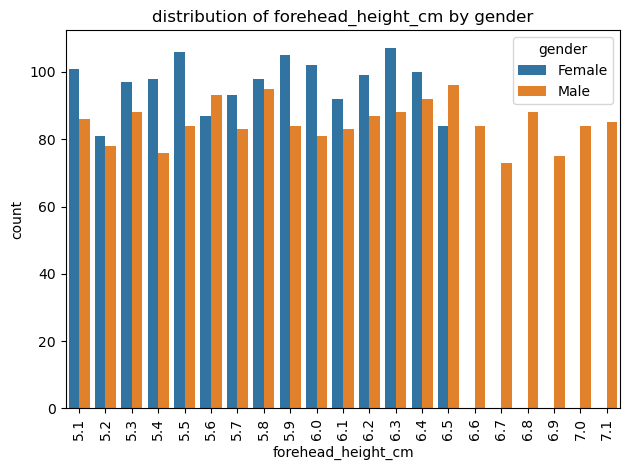

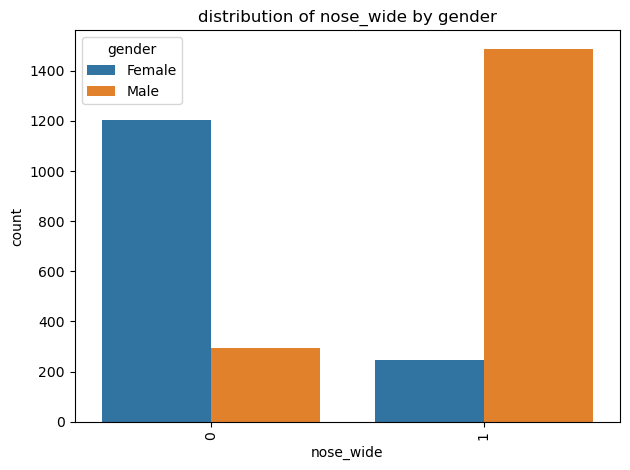

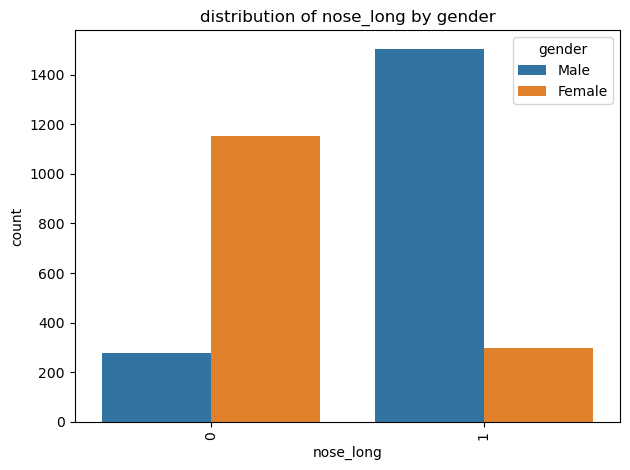

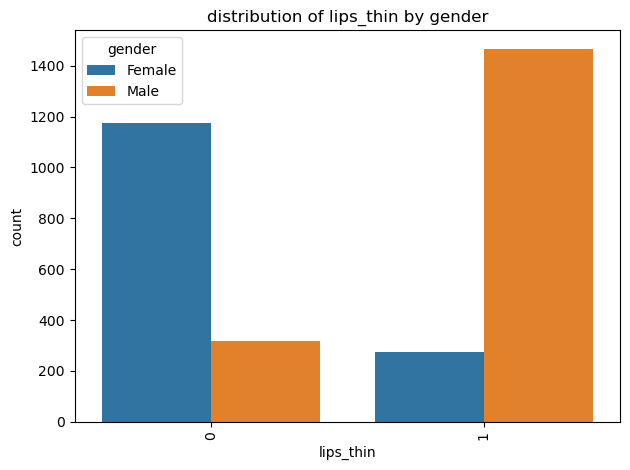

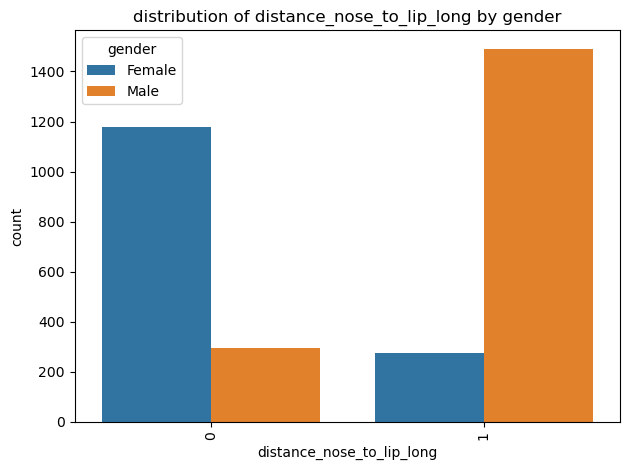

In [273]:
for col in df.columns[:-1]:
    sns.countplot(x=col,hue='gender',data=df)
    plt.title(f"distribution of {col} by gender")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [274]:
c = df.select_dtypes(include='number').corr()

<Axes: >

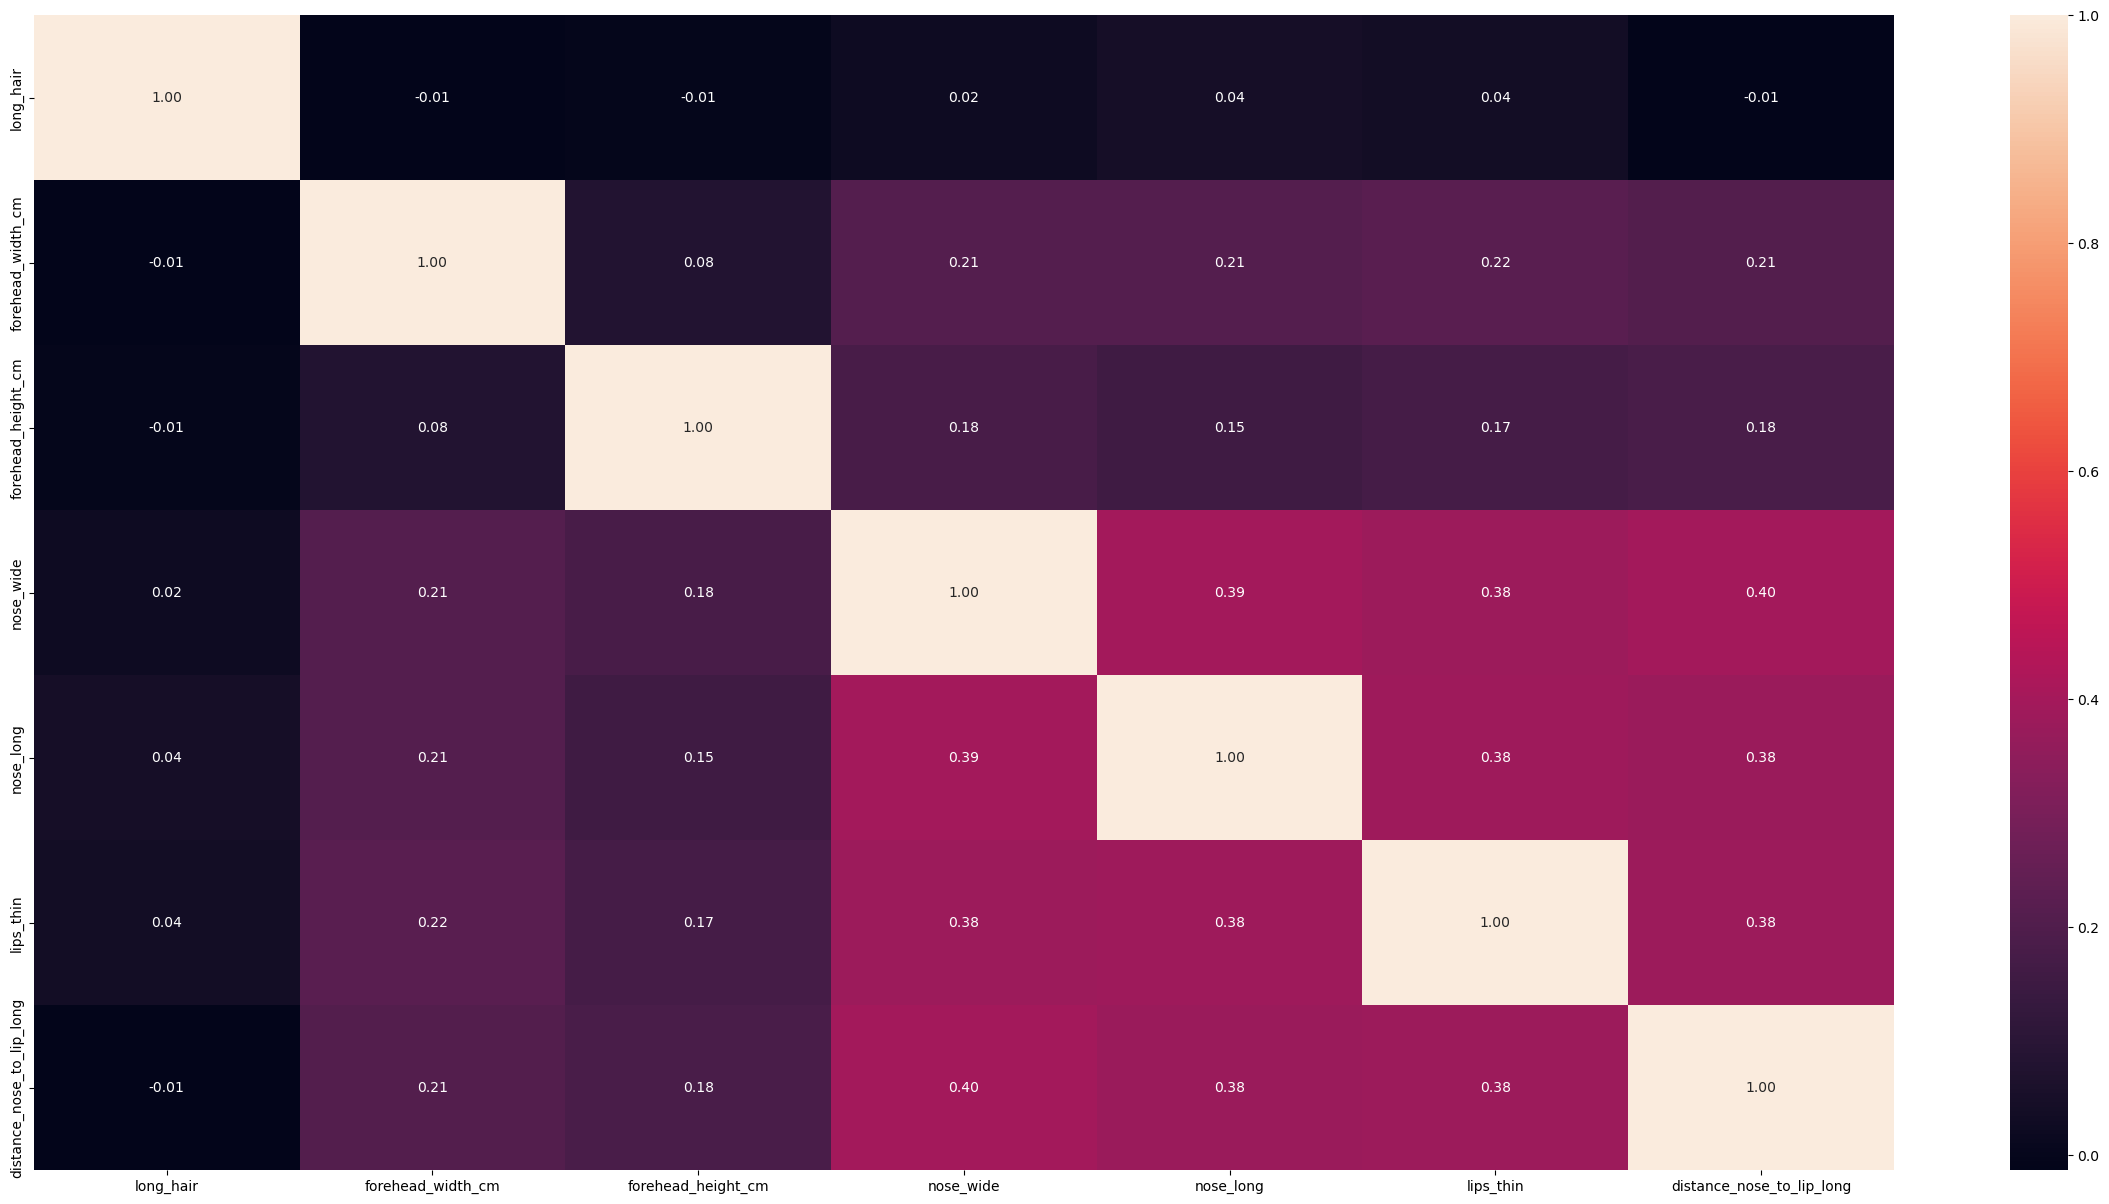

In [275]:
plt.figure(figsize=(30,15))
sns.heatmap(c,annot=True,fmt='.2f')

In [276]:
new_df=df
x=new_df[new_df.columns[:-1]]
y=new_df['gender']

In [277]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [278]:
le=LabelEncoder()
le.fit(new_df['gender'])

LabelEncoder()

In [279]:
new_df['E_gender'] = le.transform(new_df['gender'])
new_df = new_df.drop('gender', axis=1)

In [280]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3233 entries, 0 to 4995
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3233 non-null   int64  
 1   forehead_width_cm          3233 non-null   float64
 2   forehead_height_cm         3233 non-null   float64
 3   nose_wide                  3233 non-null   int64  
 4   nose_long                  3233 non-null   int64  
 5   lips_thin                  3233 non-null   int64  
 6   distance_nose_to_lip_long  3233 non-null   int64  
 7   E_gender                   3233 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 227.3 KB


In [281]:
scaler=MinMaxScaler()
columns=new_df.columns
new_df=pd.DataFrame(scaler.fit_transform(new_df))
new_df.columns=columns
new_df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,E_gender
0,1.0,0.097561,0.50,1.0,0.0,1.0,1.0,1.0
1,0.0,0.634146,0.15,0.0,0.0,1.0,0.0,0.0
2,0.0,0.097561,0.60,1.0,1.0,1.0,1.0,1.0
3,0.0,0.731707,0.50,0.0,1.0,1.0,1.0,1.0
4,1.0,0.512195,0.40,0.0,0.0,0.0,0.0,0.0


In [282]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [283]:
lr_pre_train=lr.predict(x_train)
lr_accuracy_train=accuracy_score(y_train,lr_pre_train)
print(f"train accuracy:{round(lr_accuracy_train*100,2)}%")

train accuracy:95.01%


In [284]:
lr_pre_test=lr.predict(x_test)
lr_accuracy_test=accuracy_score(y_test,lr_pre_test)
print(f"Test accuracy:{round(lr_accuracy_test*100,2)}%")

Test accuracy:95.98%


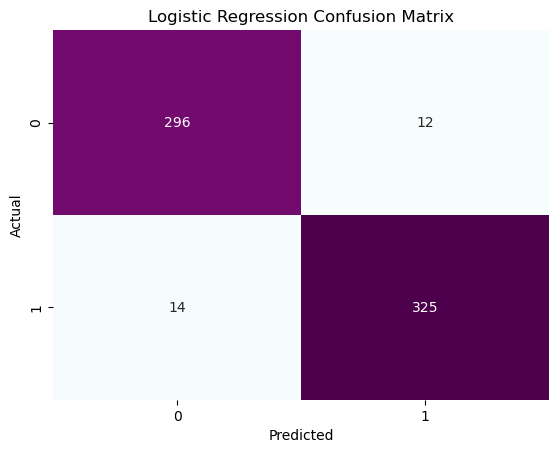

Classification report: 
               precision    recall  f1-score   support

      Female       0.95      0.96      0.96       308
        Male       0.96      0.96      0.96       339

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



In [285]:
cm = confusion_matrix(y_test, lr_pre_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print("Classification report: \n", classification_report(y_test, lr_pre_test))


In [286]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [287]:
knn_train=knn.predict(x_train)
knn_train_accuracy=accuracy_score(y_train,knn_train)
print(f"Train accuracy:{round(knn_train_accuracy*100,2)}%")

Train accuracy:97.29%


In [288]:
knn_test=knn.predict(x_test)
knn_test_accuracy=accuracy_score(y_test,knn_test)
print(f"Test accuracy:{round(knn_test_accuracy*100,2)}%")

Test accuracy:94.13%


Classification report:
              precision    recall  f1-score   support

      Female       0.92      0.95      0.94       308
        Male       0.96      0.93      0.94       339

    accuracy                           0.94       647
   macro avg       0.94      0.94      0.94       647
weighted avg       0.94      0.94      0.94       647
.


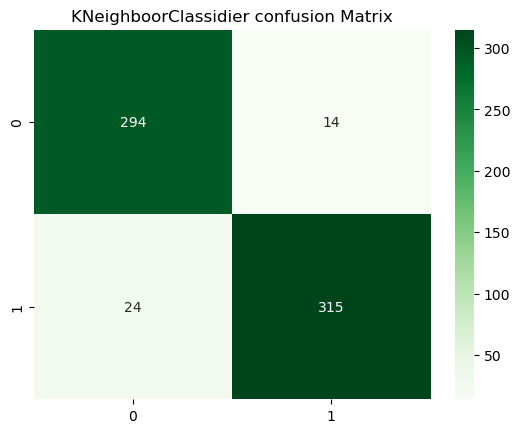

In [289]:
cm=confusion_matrix(y_test,knn_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens')
plt.title('KNeighboorClassidier confusion Matrix')
print('Classification report:\n{}.'.format(classification_report(y_test,knn_test)))

In [290]:
dt=tree.DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [291]:
dt_train_pre=dt.predict(x_train)
dt_train_accuracy=accuracy_score(y_train,dt_train_pre)
print(f"Train accuraccy:{round(dt_train_accuracy*100,2)}%")

Train accuraccy:99.77%


In [292]:
dt_test_pre=dt.predict(x_test)
dt_test_accuracy=accuracy_score(y_test,dt_test_pre)
print(f"Test accuracy:{round(dt_test_accuracy*100,2)}%")

Test accuracy:94.74%


classification report: 
              precision    recall  f1-score   support

      Female       0.94      0.94      0.94       308
        Male       0.95      0.95      0.95       339

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



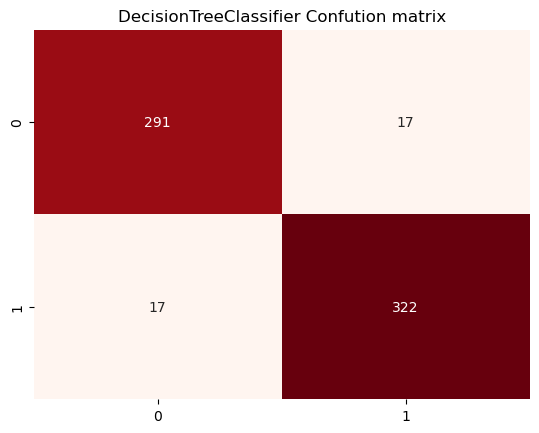

In [293]:
cm=confusion_matrix(y_test,dt_test_pre)
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds',cbar=False)
plt.title('DecisionTreeClassifier Confution matrix')
print('classification report: \n{}'.format(classification_report(y_test,dt_test_pre)))

In [294]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [295]:
rf_train_pre=rf.predict(x_train)
rf_train_accuracy=accuracy_score(y_train,rf_train_pre)
print(f"Train accuracy {round(rf_train_accuracy*100,2)}%")

Train accuracy 99.77%


In [296]:
rf_test_pre=rf.predict(x_test)
rf_test_accuracy=accuracy_score(y_test,rf_test_pre)
print(f"Test accuracy {round(rf_test_accuracy*100,2)}%")

Test accuracy 95.52%


Classification report 
              precision    recall  f1-score   support

      Female       0.95      0.95      0.95       308
        Male       0.96      0.96      0.96       339

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



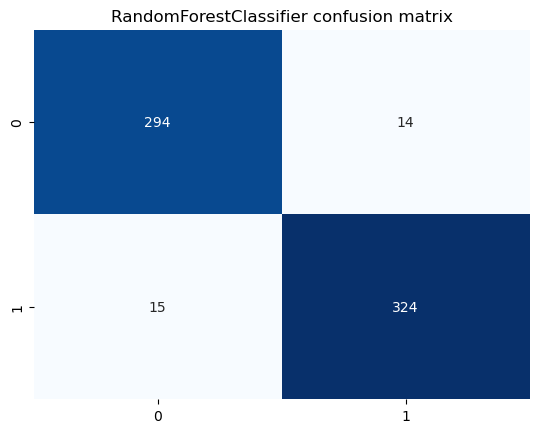

In [257]:
cm=confusion_matrix(y_test,rf_test_pre)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.title('RandomForestClassifier confusion matrix')
print('Classification report \n{}'.format(classification_report(y_test,rf_test_pre)))

In [258]:
iris=load_iris()
x=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [220]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [221]:
gbc_train_pre=gbc.predict(X_train)
gbc_train_accuracy=accuracy_score(y_train,gbc_train_pre)
print(f"train accuracy: {round(gbc_train_accuracy*100,2)}%")

train accuracy: 100.0%


In [222]:
gbc_test_pre=gbc.predict(X_test)
gbc_test_accuracy=accuracy_score(y_test,gbc_test_pre)
print(f"Test accuracy: {round(gbc_test_accuracy*100,2)}%")

Test accuracy: 98.0%


classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



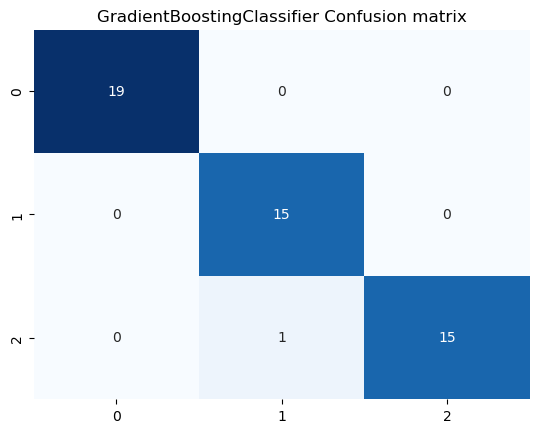

In [223]:
cm=confusion_matrix(y_test,gbc_test_pre)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.title('GradientBoostingClassifier Confusion matrix')
print('classification report \n{}'.format(classification_report(y_test,gbc_test_pre)))

In [224]:
model=pd.DataFrame({'Model':['Logistic regression','K nearest neighbour','Desision Tre classifier','Random Forest classifier','G_Boosting Classifier'],
                    'Training accuracy':[lr_accuracy_train,knn_train_accuracy,dt_train_accuracy,rf_train_accuracy,gbc_train_accuracy],
                    'Test accuracy':[lr_accuracy_test,knn_test_accuracy,dt_test_accuracy,rf_test_accuracy,gbc_test_accuracy]})

In [225]:
model.sort_values(by='Training accuracy',ascending=False)

,Model,Training accuracy,Test accuracy
4,G_Boosting Classifier,1.000000,0.980000
2,Desision Tre classifier,0.997680,0.947450
3,Random Forest classifier,0.997680,0.955178
1,K nearest neighbour,0.972931,0.941267
0,Logistic regression,0.950116,0.959815




 Accuracy of knn:0.94

 Accuracy of Logistic regression:0.96

 Accuracy of Decision Tree:0.95

 Accuracy of Random Forest:0.96

 Accuracy of Gradient Boosting:0.98

Accuracy of GradientBoostingClassifierB is better than Logistic Regression, DecisionTreeClassifier, RandomForestClassifier, KNN


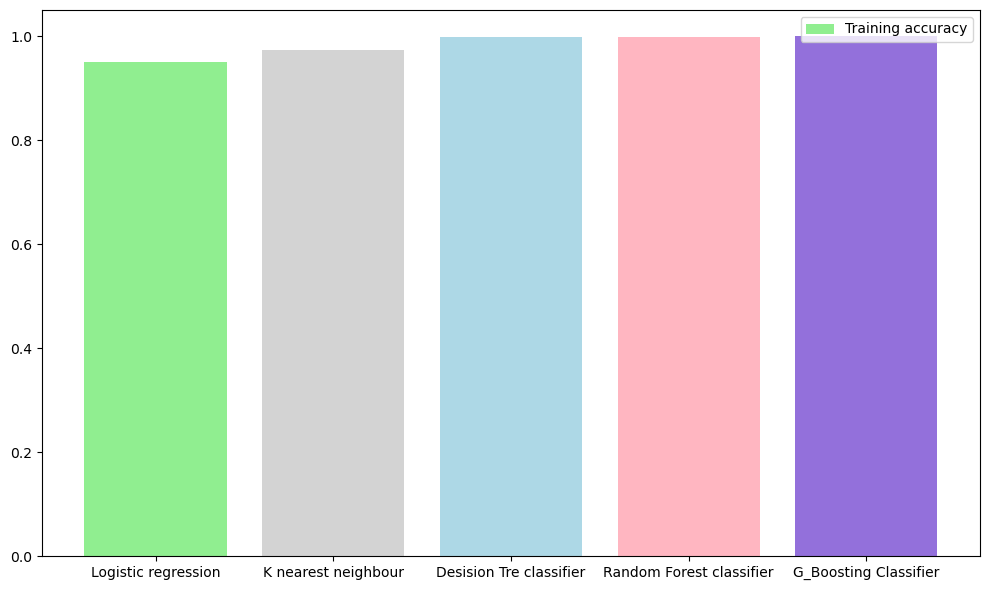

In [226]:
fig=plt.figure(figsize=(10,6))
plt.bar(model['Model'],model['Training accuracy'],color=['lightgreen','lightgray','lightblue','lightpink','mediumpurple'])
plt.legend(['Training accuracy'],loc='upper right')
plt.tight_layout()

print(f"\n\n Accuracy of knn:{knn_test_accuracy:.2f}\n")
print(f" Accuracy of Logistic regression:{lr_accuracy_test:.2f}\n")
print(f" Accuracy of Decision Tree:{dt_test_accuracy:.2f}\n")
print(f" Accuracy of Random Forest:{rf_test_accuracy:.2f}\n")
print(f" Accuracy of Gradient Boosting:{gbc_test_accuracy:.2f}\n")


if((lr_accuracy_test>knn_test_accuracy)and(lr_accuracy_test>dt_test_accuracy)and(lr_accuracy_test>rf_test_accuracy)and(lr_accuracy_test>gbc_test_accuracy)):
    print('Accuracy of Logistic Regression is better than KNN, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifierB')
elif((knn_test_accuracy>lr_accuracy_train)and(knn_test_accuracy>dt_test_accuracy)and(knn_test_accuracy>gbc_test_accuracy)):
    print('Accuracy of KNN is better than Logistic Regression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifierB')
elif((dt_test_accuracy>lr_accuracy_test)and(dt_test_accuracy>knn_test_accuracy)and(dt_test_accuracy>rf_test_accuracy)and(dt_test_accuracy>gbc_test_accuracy)):
    print('Accuracy of DecisionTreeClassifier is better than Logistic Regression, KNN, RandomForestClassifier, GradientBoostingClassifierB')
elif((rf_test_accuracy>lr_accuracy_test)and(rf_test_accuracy>knn_test_accuracy)and(rf_test_accuracy>dt_test_accuracy)and(rf_test_accuracy>gbc_test_accuracy)):
    print('Accuracy of RandomForestClassifier is better than Logistic Regression, DecisionTreeClassifier, KNN, GradientBoostingClassifierB')
elif((gbc_test_accuracy>lr_accuracy_test)and(gbc_test_accuracy>knn_test_accuracy)and(gbc_test_accuracy>dt_test_accuracy)and(gbc_test_accuracy>rf_test_accuracy)):
    print('Accuracy of GradientBoostingClassifierB is better than Logistic Regression, DecisionTreeClassifier, RandomForestClassifier, KNN')
else:
    print('all models have the same accuracy')




